##### Copyright 2025 Patrick Loeber, Google LLC

In [ ]:

#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Workshop: Build with Gemini (Part 2)

<a target="_blank" href="https://colab.sandbox.google.com/github/patrickloeber/workshop-build-with-gemini/blob/main/notebooks/part-2-multimodal-understanding.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This workshop teaches how to build with Gemini using the Gemini API and Python SDK.

Course outline:

- **[Part1: Quickstart + Text prompting](https://github.com/patrickloeber/workshop-build-with-gemini/blob/main/notebooks/part-1-text-prompting.ipynb)**

- **Part 2 (this notebook): Multimodal understanding (image, video, audio, docs, code)**
  - Image
  - Video
  - Audio
  - Documents (PDFs)
  - Code
  - Final excercise: Analyze supermarket invoice

- **[Part 3: Thinking models + agentic capabilities (tool usage)](https://github.com/patrickloeber/workshop-build-with-gemini/blob/main/notebooks/part-3-thinking-and-tools.ipynb)**

## 0. Use the Google AI Studio as playground

Explore and play with all models in the [Google AI Studio](https://aistudio.google.com/apikey).

## 1. Setup

Get a free API key in the [Google AI Studio](https://aistudio.google.com/apikey) and set up the [Google Gen AI Python SDK](https://github.com/googleapis/python-genai)

In [1]:
%pip install -U -q google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.7/159.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

In [ ]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

In [ ]:
MODEL = "gemini-2.0-flash"

## Image understanding

Gemini models are able to process and understand images, e.g., you can use Gemini to describe, caption, and answer questions about images, and you can even use it for object detection.

In [ ]:
!curl -o image.jpg "https://storage.googleapis.com/generativeai-downloads/images/Cupcakes.jpg"

(1024, 1024)


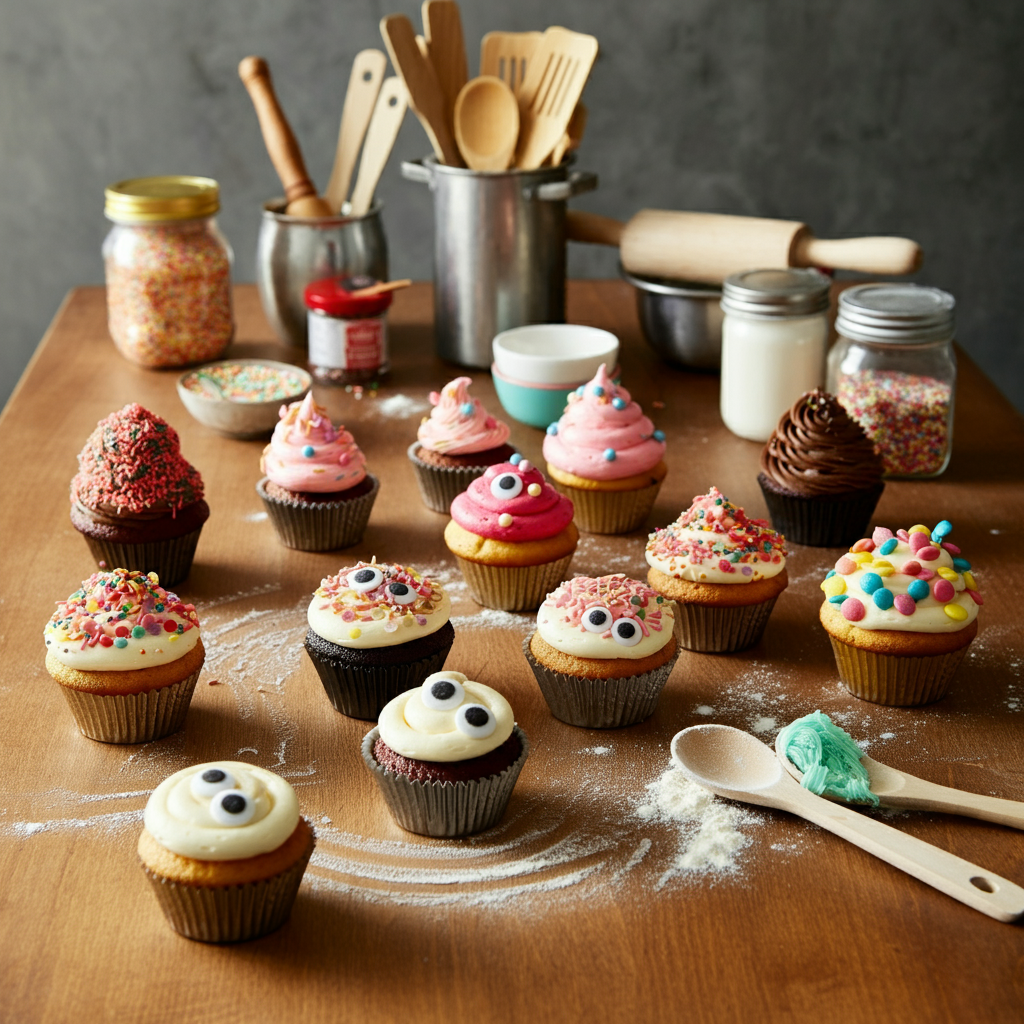

In [ ]:
from PIL import Image
image = Image.open("image.jpg")
print(image.size)
image

For total image payload size less than 20MB, we recommend either uploading base64 encoded images or directly uploading locally stored image files.

You can use a Pillow image in your prompt:

In [ ]:
response = client.models.generate_content(
    model=MODEL,
    contents=["What is this image?", image])

print(response.text)

The image shows a collection of decorated cupcakes on a wooden table surrounded by baking supplies. The cupcakes are decorated with various toppings, including frosting, sprinkles, and candy eyes. The baking supplies include jars of sprinkles, a rolling pin, and utensils.


Or you can use base64 encoded images

In [ ]:
import requests

res = requests.get("https://storage.googleapis.com/generativeai-downloads/images/Cupcakes.jpg")

response = client.models.generate_content(
    model=MODEL,
    contents=["What is this image?",
              types.Part.from_bytes(data=res.content, mime_type="image/jpeg")]
)

print(response.text)

The image features an assortment of decorated cupcakes arranged on a wooden table. Some of the cupcakes have different colors of frosting and are topped with sprinkles, while others have edible "googly" eyes. In the background, there are various baking tools and ingredients such as wooden utensils, rolling pins, jars of sprinkles, and bowls. The overall composition suggests a scene of baking or decorating cupcakes.


You can use the File API for large payloads (>20MB).

 The File API lets you store up to 20 GB of files per project, with a per-file maximum size of 2 GB. Files are stored for 48 hours. They can be accessed in that period with your API key, but cannot be downloaded from the API. It is available at no cost in all regions where the Gemini API is available.

In [ ]:
img_path = "image.jpg"
uploaded_image = client.files.upload(file=img_path)
print(uploaded_image)

response = client.models.generate_content(
    model=MODEL,
    contents=["What is this image?",
              uploaded_image]
)

print(response.text)

name='files/6juqwiyhe720' display_name=None mime_type='image/jpeg' size_bytes=1619989 create_time=datetime.datetime(2025, 4, 21, 8, 10, 9, 43188, tzinfo=TzInfo(UTC)) expiration_time=datetime.datetime(2025, 4, 23, 8, 10, 9, 5071, tzinfo=TzInfo(UTC)) update_time=datetime.datetime(2025, 4, 21, 8, 10, 9, 43188, tzinfo=TzInfo(UTC)) sha256_hash='MmRlYjBjZTlkMzUxMWI2N2RiOTliZmE5ZjFkOTVkN2JhZTNiZGMwNDNlYmU1MTQ4ZjkxMzhiMjJmODY2MDY2Nw==' uri='https://generativelanguage.googleapis.com/v1beta/files/6juqwiyhe720' download_uri=None state=<FileState.ACTIVE: 'ACTIVE'> source=<FileSource.UPLOADED: 'UPLOADED'> video_metadata=None error=None
The image shows an assortment of decorated cupcakes on a wooden table. The cupcakes have various frostings, some with sprinkles, and others with "googly" candy eyes. Baking utensils like spoons, a rolling pin, and jars of sprinkles are also visible in the background.


#### **!! Exercise!!**

- Use the following image: https://storage.googleapis.com/generativeai-downloads/images/croissant.jpg
- Tell Gemini to describe the image
- Then asked Gemini for a recipe to bake this item. Include item names and quantities for the recipe.

In [ ]:
!curl -o croissant.jpg "https://storage.googleapis.com/generativeai-downloads/images/croissant.jpg"

In [ ]:
from PIL import Image
image2 = Image.open("croissant.jpg")

In [ ]:
response = client.models.generate_content(
    model=MODEL,
    contents=["Tell me the recipe and how to bake it?", image2])

print(response.text)

Okay! Based on the image you provided, I'll give you a recipe for classic butter croissants. Croissants are labor-intensive, but the result is well worth the effort.

**Ingredients**

**For the Dough (Détrempe):**

*   500g (about 4 cups) all-purpose flour, plus more for dusting
*   10g (2 teaspoons) instant dry yeast
*   60g (1/4 cup) granulated sugar
*   10g (2 teaspoons) salt
*   250ml (1 cup + 1 tablespoon) cold water
*   50g (1/4 cup) unsalted butter, softened

**For the Butter Block (Beurrage):**

*   300g (1 1/3 cups) unsalted butter, very cold

**For Egg Wash:**

*   1 egg
*   1 tablespoon milk

**Instructions**

**Day 1: Make the Dough and Butter Block**

1.  **Mix the Dough:** In the bowl of a stand mixer fitted with the dough hook, combine flour, yeast, sugar, and salt. Add cold water and softened butter. Mix on low speed until the dough comes together. Increase speed to medium and knead for 5-7 minutes, until the dough is smooth and elastic.

2.  **First Rise:** Form the do

#### Bounding box

Gemini models are trained to return bounding box coordinates.

**Important**: Gemini returns bounding box coordinates in this format:

- `[y_min, x_min, y_max, x_max]`
- and normalized to `[0,1000]`

**Tip**: Ask Gemini to return JSON format and configure `config={'response_mime_type': 'application/json'}`:

In [ ]:
import json

prompt = """Detect the 2d bounding boxes of all cupcakes. The label should be the topping of the cupcake.
Return JSON format."""

response = client.models.generate_content(
    model=MODEL,
    contents=[prompt, image],
    config={
        'response_mime_type': 'application/json',
    }
)

bboxes = json.loads(response.text)
bboxes

[{'box_2d': [382, 62, 564, 202], 'label': 'sprinkles'},
 {'box_2d': [545, 40, 727, 199], 'label': 'sprinkles'},
 {'box_2d': [651, 352, 818, 523], 'label': 'eyeballs'},
 {'box_2d': [361, 402, 494, 501], 'label': 'pink frosting'},
 {'box_2d': [447, 435, 598, 556], 'label': 'pink frosting'},
 {'box_2d': [543, 293, 702, 445], 'label': 'eyeballs'},
 {'box_2d': [371, 258, 540, 368], 'label': 'pink frosting'},
 {'box_2d': [368, 528, 524, 649], 'label': 'pink frosting'},
 {'box_2d': [741, 141, 924, 310], 'label': 'eyeballs'},
 {'box_2d': [492, 625, 636, 775], 'label': 'sprinkles'},
 {'box_2d': [548, 518, 715, 664], 'label': 'eyeballs'},
 {'box_2d': [507, 799, 692, 964], 'label': 'sprinkles'},
 {'box_2d': [380, 732, 536, 863], 'label': 'chocolate'}]

Create a helper function to denormalize and draw the bounding boxes:



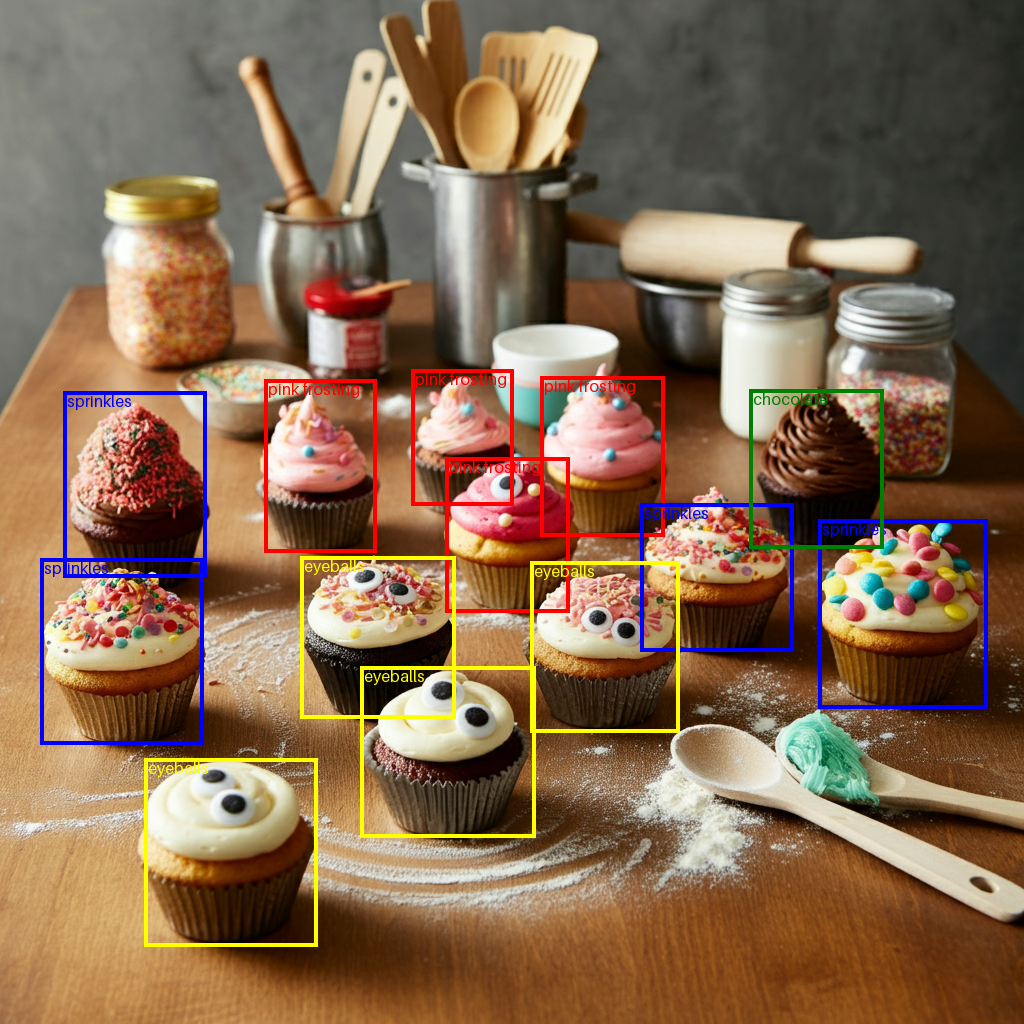

In [ ]:
from PIL import ImageDraw, ImageFont

line_width = 4
font = ImageFont.load_default(size=16)

labels = list(set(box['label'] for box in bboxes))

def draw_bounding_boxes(image, bounding_boxes):
    img = image.copy()
    width, height = img.size

    draw = ImageDraw.Draw(img)

    colors = ['blue','red','green','yellow','orange','pink','purple']

    for box in bounding_boxes:
        y_min, x_min, y_max, x_max = box['box_2d']
        label = box['label']

        # Convert normalized coordinates to absolute coordinates
        y_min = int(y_min/1000 * height)
        x_min = int(x_min/1000 * width)
        y_max = int(y_max/1000 * height)
        x_max = int(x_max/1000 * width)

        color = colors[labels.index(label) % len(colors)]
        draw.rectangle([(x_min, y_min), (x_max, y_max)], outline=color, width=line_width)

        draw.text((x_min+line_width, y_min), label, fill=color, font=font)

    display(img)

draw_bounding_boxes(image, bboxes)

## Video

Gemini models are able to process videos. The 1M context window support up to approximately an hour of video data.

For technical details about supported video formats, see [the docs](https://ai.google.dev/gemini-api/docs/vision#technical-details-video).

In [ ]:
!wget https://storage.googleapis.com/generativeai-downloads/videos/post_its.mp4 -O Post_its.mp4 -q

Use the File API to upload a video. Here we also check the processing state:

In [ ]:
import time

def upload_video(video_file_name):
  video_file = client.files.upload(file=video_file_name)

  while video_file.state == "PROCESSING":
      print('Waiting for video to be processed.')
      time.sleep(10)
      video_file = client.files.get(name=video_file.name)

  if video_file.state == "FAILED":
    raise ValueError(video_file.state)

  print(f'Video processing complete: ' + video_file.uri)
  return video_file

post_its_video = upload_video('Post_its.mp4')

Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/g9dhhxfglk5


Now you can use the uploaded file in your prompt:

In [ ]:
response = client.models.generate_content(
    model=MODEL,
    contents=[
        post_its_video,
        'Detect all sticky notes and list the names on the notes',
    ]
)

print(response.text)

Here are all of the names that are written on the sticky notes in the image:
- Convergence
- Lunar Eclipse
- Canis Major
- Leo Minor
- Andromeda's Reach
- Stellar Nexus
- Orion's Belt
- Bayes' Theorem
- Lyra
- Fractal
- Riemann's Hypothesis
- Sagitta
- Celestial Drift
- Comets Tail
- Astral Forge
- Centaurus
- Symmetry
- Taylor Series
- Pandora's Box
- Lynx
- Chaos Field
- Delphinus
- Serpens
- Equilibrium
- Golden Ratio
- Stokes' Theorem
- Draco
- Supernova Echo
- Chimera Dream
- Persius Shield
- Euler's Path
- Athena's Eye
- Medusa
- Hera
- Phoenix
- Echo
- Zephyr
- Galactic Core
- Prometheus Rising
- Odin
- Titan
- Aether
- Athena
- Cerberus
- Vector
- Orion's Sword
- Chaos Theory
- Infinity Loop


#### YouTube video support

The Gemini API and AI Studio support YouTube URLs as a file data Part. You can include a YouTube URL with a prompt asking the model to summarize, translate, or otherwise interact with the video content.

In [ ]:
youtube_url = "https://youtu.be/LlWDx0LSDok"

response = client.models.generate_content(
    model=MODEL,
    contents=types.Content(
        parts=[
            types.Part(text='Can you summarize this video?'),
            types.Part(
                file_data=types.FileData(file_uri=youtube_url)
            )
        ]
    )
)

print(response.text)

Sure, here is a summary of the video.

The video profiles Paige Bailey, a Lead Product Manager at Google DeepMind. She discusses her excitement for Machine Learning and Generative AI to accelerate software development. She shares her experience growing up in a small town in Texas, as well as her first computer that she and her mom rescued from being thrown away. She shares that her computer was like "water in a desert" and allowed her to have a broader view of the world. Paige is interested in computational neuroscience. She shares that she was the product lead for Palm 2, a large language model. She and her colleagues are interested in AI and integrating Machine Learning into every product, especially to save people time and make them more productive. She states that if one wants to make an impact and understand how people interact with models, then Google DeepMind is the place to be. The entire world is now excited about generative AI.


#### **!! Exercise !!**

- Your turn! Use this video (*If I could only cook one dish for a vegan skeptic* from Rainbow Plant Life: https://youtu.be/BHRyfEbhFFU
- Ask Gemini about to describe the video and to get the recipe

In [ ]:
youtube_url = "https://youtu.be/BHRyfEbhFFU"

response = client.models.generate_content(
    model=MODEL,
    contents=types.Content(
        parts=[
            types.Part(text='Describe the video. Then tell me the recipe and cooking instructions'),
            types.Part(
                file_data=types.FileData(file_uri=youtube_url)
            )
        ]
    )
)

print(response.text)

Okay, here is a description of the video, followed by the recipe and cooking instructions.

The video shows a woman standing in a modern kitchen. She shares that she gets asked a lot of questions about how to cook for non-vegan family members when the person cooking is vegan, so she will be sharing an easy red lentil curry recipe that can be made on a weeknight. She talks about how this recipe is beginner-friendly and made with pantry ingredients. 

The recipe and instructions are shown in the video. 

Vegan Red Lentil Curry

Ingredients:
Garlic
Serrano peppers
Ginger
Turmeric
Cumin
Coriander
Curry powder
Garam masala
Indian chili powder
Red lentils
Coconut oil
Salt, pepper
Vegetable broth
Crushed tomatoes
Coconut milk
Almond butter
Cilantro
Lemon juice

Instructions:
1. Begin by prepping the aromatics. Mince garlic, serano peppers, and ginger.
2. The turmeric used can be fresh or ground. If using fresh, grate it with a microplane or grater.
3. Mix together all the ground spices: cumin

## Audio

You can use Gemini to process audio files. For example, you can use it to generate a transcript of an audio file or to summarize the content of an audio file.

Gemini represents each second of audio as 32 tokens; for example, one minute of audio is represented as 1,920 tokens.

For more info about technical details and supported formats, see [the docs](https://ai.google.dev/gemini-api/docs/audio#supported-formats).

In [ ]:
URL = "https://storage.googleapis.com/generativeai-downloads/data/jeff-dean-presentation.mp3"
!wget -q $URL -O sample.mp3

In [ ]:
import IPython
IPython.display.Audio("sample.mp3")

In [ ]:
uploaded_audio_file = client.files.upload(file='sample.mp3')

response = client.models.generate_content(
  model=MODEL,
  contents=[
    'Here is a talk by Jeff Dean. Summarize the talk in 4-5 sentences.',
    uploaded_audio_file,
  ]
)

print(response.text)

In his talk, Jeff Dean discusses the exciting trends and advancements in machine learning over the past decade. Machine learning has changed our expectations of what computers can do and that computers now have the ability to perceive and sense the world around us. Increasing the size and complexity of machine learning models alongside compute resources, richer data sets, and specialized computer hardware leads to better results.  Because we want different kinds of hardware in order to run these computations efficiently, we can focus on making computers exceptionally good at a narrower set of tasks. Furthermore, new machine learning techniques like transformer models have improved various areas like image and speech recognition, as well as image generation, translation, and the capabilities of chatbots.


1 minute audio = ~130 words or ~170 tokens
8192 / 170 = ~48 min output length.

You can use Gemini for transcribing, but be aware of the output token limit.

We can use `pydub` to split the audio file:

In [ ]:
%pip install pydub

In [ ]:
from pydub import AudioSegment
audio = AudioSegment.from_mp3("sample.mp3")
duration = 60 * 1000  # pydub works in milliseconds
audio_clip = audio[:duration]

In [ ]:
audio_clip

In [ ]:
import io
buffer = io.BytesIO()
audio_clip.export(buffer, format="mp3")

audio_bytes = buffer.read()

For files below 20 MB, you can provide the audio file directly as inline data in your request.

To do this, use `types.Part.from_bytes` and add it to the `contents` argument when calling `generate_content()`:

In [ ]:
response = client.models.generate_content(
  model=MODEL,
  contents=[
    'Transcribe this audio clip',
    types.Part.from_bytes(
      data=audio_bytes,
      mime_type='audio/mp3',
    )
  ]
)

print(response.text)

I'm going to talk to you about exciting trends in machine learning. It's going to be a very broad talk. It's not going to go into detail in any particular area, but I think it it's important to understand what is happening in this field and what is exciting and also, you know, what are the opportunities and also what are the things we should be sort of aware of as we build out this technology for everyone. Um, and I'm presenting the work of many, many people at Google. So some of this is work I've been involved in or the co-author, some of it is not, it's just cool work. I think you should learn about. So uh uh with that, I'm going to now give you another glimpse at the slide number. Uh 2207201. Um, and uh this is how you ask questions for this talk. Um, so with that, let's let's start with some observations. Um, so in recent years, I think machine learning has really changed our expectations of what we think of computers as being able to do. If you think back 10 or 15 years ago, you k

Let's use a return format that's easier to understand:

In [ ]:
response = client.models.generate_content(
  model=MODEL,
  contents=[
    'Transcribe this audio clip. Return JSON format with timestamp in mm:ss and text',
    types.Part.from_bytes(
      data=audio_bytes,
      mime_type='audio/mp3',
    )
  ],
  config={
        'response_mime_type': 'application/json',
  }
)

print(response.text)

[
  {
    "timestamp": "00:00",
    "text": "I'm going to talk to you about exciting trends in machine learning. It's going to be a very broad talk. It's not going to go into detail in any particular area, but I think it it's important to understand what is happening in this field and what is exciting and also, you know, what are the opportunities and also what are the things we should be sort of aware of as we build out this technology for everyone."
  },
  {
    "timestamp": "00:20",
    "text": "Um and I'm presenting the work of many, many people at Google. So some of this is work I've been involved in with a co-author, some of it is not. It's just cool work I think you should learn about. So, uh uh with that, I'm going to now give you another glimpse at the Slido number. Uh 2207201. Um and uh this is how you ask questions for this talk."
  },
  {
    "timestamp": "00:53",
    "text": "Um so with that, let's let's start with some observations. Um so in recent years, I think machine 

Another useful prompt you can try with audio files:
- Refer to timestamps: `Provide a transcript of the speech from 02:30 to 03:29.`

## PDFs

PDFs can also be used in the same way:

In [ ]:
URL = "https://storage.googleapis.com/generativeai-downloads/data/pdf_structured_outputs/invoice.pdf"
!wget -q $URL -O invoice.pdf

In [ ]:
uploaded_pdf = client.files.upload(file='invoice.pdf', config={'display_name': 'invoice.pdf'})

response = client.models.generate_content(
  model=MODEL,
  contents=[
    'Extract the date of the invoice and the total cost',
    uploaded_pdf,
  ]
)

print(response.text)

Here's the information extracted from the image:

*   **Date of invoice:** 10/09/2012
*   **Total cost:** $ 544,46


In [ ]:
file_size = client.models.count_tokens(model=MODEL, contents=uploaded_pdf)
print(f'{uploaded_pdf.display_name} equals to {file_size.total_tokens} tokens')

invoice.pdf equals to 259 tokens


**Next step**: A cool feature I recommend is to combine it with structured outputs using Pydantic.

In [ ]:
from pydantic import BaseModel, Field

class Item(BaseModel):
    description: str = Field(description="The description of the item")
    quantity: float = Field(description="The Qty of the item")
    gross_worth: float = Field(description="The gross worth of the item")

class Invoice(BaseModel):
    """Extract the invoice number, date and all list items with description, quantity and gross worth and the total gross worth."""
    invoice_number: str = Field(description="The invoice number e.g. 1234567890")
    date: str = Field(description="The date of the invoice e.g. 2024-01-01")
    items: list[Item] = Field(description="The list of items with description, quantity and gross worth")
    total_gross_worth: float = Field(description="The total gross worth of the invoice")


prompt = f"Extract the structured data from the following PDF file"
response = client.models.generate_content(
    model=MODEL,
    contents=[prompt, uploaded_pdf],
    config={'response_mime_type': 'application/json',
            'response_schema': Invoice
    }
)

response.parsed

Invoice(invoice_number='27301261', date='10/09/2012', items=[Item(description='Lilly Pulitzer dress Size 2', quantity=5.0, gross_worth=247.5), Item(description='New ERIN Erin Fertherston Straight Dress White Sequence Lining Sleeveless SZ 10', quantity=1.0, gross_worth=65.99), Item(description='Sequence dress Size Small', quantity=3.0, gross_worth=115.5), Item(description='fire los angeles dress Medium', quantity=3.0, gross_worth=21.45), Item(description="Eileen Fisher Women's Long Sleeve Fleece Lined Front Pockets Dress XS Gray", quantity=3.0, gross_worth=52.77), Item(description='Lularoe Nicole Dress Size Small Light Solid Grey/ White Ringer Tee Trim', quantity=2.0, gross_worth=8.25), Item(description='J.Crew Collection Black & White sweater Dress sz S', quantity=1.0, gross_worth=33.0)], total_gross_worth=544.46)

In [ ]:
response.parsed.model_dump()

{'invoice_number': '27301261',
 'date': '10/09/2012',
 'items': [{'description': 'Lilly Pulitzer dress Size 2',
   'quantity': 5.0,
   'gross_worth': 247.5},
  {'description': 'New ERIN Erin Fertherston Straight Dress White Sequence Lining Sleeveless SZ 10',
   'quantity': 1.0,
   'gross_worth': 65.99},
  {'description': 'Sequence dress Size Small',
   'quantity': 3.0,
   'gross_worth': 115.5},
  {'description': 'fire los angeles dress Medium',
   'quantity': 3.0,
   'gross_worth': 21.45},
  {'description': "Eileen Fisher Women's Long Sleeve Fleece Lined Front Pockets Dress XS Gray",
   'quantity': 3.0,
   'gross_worth': 52.77},
  {'description': 'Lularoe Nicole Dress Size Small Light Solid Grey/ White Ringer Tee Trim',
   'quantity': 2.0,
   'gross_worth': 8.25},
  {'description': 'J.Crew Collection Black & White sweater Dress sz S',
   'quantity': 1.0,
   'gross_worth': 33.0}],
 'total_gross_worth': 544.46}

## Code

Gemini is good at understanding and generating code.

Let's use [gitingest](https://github.com/cyclotruc/gitingest) to chat with a GitHub repo:

In [ ]:
%pip install gitingest

In [ ]:
from gitingest import ingest_async

summary, tree, content = await ingest_async("https://github.com/patrickloeber/snake-ai-pytorch")

In [ ]:
print(summary)

Repository: patrickloeber/snake-ai-pytorch
Files analyzed: 8

Estimated tokens: 4.4k


In [ ]:
print(tree)

Directory structure:
└── patrickloeber-snake-ai-pytorch/
    ├── README.md
    ├── LICENSE
    ├── agent.py
    ├── arial.ttf
    ├── game.py
    ├── helper.py
    ├── model.py
    └── snake_game_human.py



In [ ]:
prompt = f"""Explain what the model.py file in this code base does:

Code:
{content}
"""

chat = client.chats.create(model=MODEL)

response = chat.send_message(prompt)
print(response.text)

The `model.py` file defines the neural network architecture and the training process for the AI agent playing the Snake game.  Specifically, it contains the following:

1.  **`Linear_QNet` Class:** This class defines the neural network model itself. It's a simple, fully connected (linear) neural network using PyTorch.
    *   `__init__(self, input_size, hidden_size, output_size)`:  The constructor initializes the network layers. It takes the input size (number of features representing the game state), a hidden layer size, and the output size (number of possible actions). It creates two linear layers: `linear1` (input to hidden) and `linear2` (hidden to output).
    *   `forward(self, x)`:  This method defines the forward pass of the network. It takes the input `x`, applies the first linear layer, then a ReLU (Rectified Linear Unit) activation function, and finally the second linear layer. The output is the predicted Q-values for each action.
    *   `save(self, file_name='model.pth')`:

In [ ]:
response = chat.send_message("Explain the `save` function in more detail")
print(response.text)

Okay, let's break down the `save` function in the `Linear_QNet` class step-by-step:

```python
    def save(self, file_name='model.pth'):
        model_folder_path = './model'
        if not os.path.exists(model_folder_path):
            os.makedirs(model_folder_path)

        file_name = os.path.join(model_folder_path, file_name)
        torch.save(self.state_dict(), file_name)
```

**Purpose:**

The primary goal of this function is to persist the trained neural network's knowledge to disk.  This allows you to:

*   **Resume Training:** Load the model later and continue training from where you left off.
*   **Deploy the Model:** Use the trained model to play Snake without having to retrain it every time.
*   **Experiment Tracking:** Save different versions of the model after different training runs to compare their performance.

**Explanation:**

1.  **`def save(self, file_name='model.pth'):`**
    *   This defines the `save` method within the `Linear_QNet` class.
    *   It takes an 

In [ ]:
response = chat.send_message("Refactor the `save` function and use pathlib instead of os. Return only the refactored function")
print(response.text)

```python
    def save(self, file_name='model.pth'):
        from pathlib import Path

        model_folder_path = Path('./model')
        model_folder_path.mkdir(parents=True, exist_ok=True)

        file_name = model_folder_path / file_name
        torch.save(self.state_dict(), file_name)
```


## Exercise: Analyze supermarket invoice

Task:
- Define a schema for a single item that contains `item_name` and `item_cost`
- Define a schema for the supermarket invoice with `items`, `date`, and `total_cost`
- Use Gemini to extract all info from the supermarket bill into the defined supermarket invoice schema.
- Ask Gemini to list a few healthy recipes based on the items. If you have dietary restrictions, tell Gemini about it!

In [ ]:
import requests
url = 'https://raw.githubusercontent.com/patrickloeber/workshop-build-with-gemini/main/data/rewe_invoice.pdf'
res = requests.get(url)
with open("rewe_invoice.pdf", "wb") as f:
    f.write(res.content)

In [ ]:
rewe_pdf = client.files.upload(file='rewe_invoice.pdf')

In [ ]:
class SupermarketItem(BaseModel):
    item_name: str = Field(description="The product")
    item_cost: float = Field(description="The price of the product")

class SupermarketInvoice(BaseModel):
    items: list[SupermarketItem] = Field(description="The list of items")
    date: str = Field(description="The date of the invoice")
    total_cost: float = Field(description="The total cost of the invoice")


prompt = f"Extract the structured data from the following PDF file"
response = client.models.generate_content(
    model=MODEL,
    contents=[prompt, rewe_pdf],
    config={'response_mime_type': 'application/json',
            'response_schema': SupermarketInvoice
    }
)

response.parsed

SupermarketInvoice(items=[SupermarketItem(item_name='BUTTERKAESE', item_cost=1.79), SupermarketItem(item_name='BRIOCHE BUNS 4ER', item_cost=1.69), SupermarketItem(item_name='HUMMUS NATUR', item_cost=0.99), SupermarketItem(item_name='SENSATIONAL BUR.', item_cost=3.19), SupermarketItem(item_name='BANANE CHIQUITA', item_cost=0.7), SupermarketItem(item_name='SUESSKARTOFFEL', item_cost=1.99), SupermarketItem(item_name='EISBERGSALAT', item_cost=1.19), SupermarketItem(item_name='CHERRYROMATOMATE', item_cost=1.15), SupermarketItem(item_name='BIO EIER KL. S-L', item_cost=2.99), SupermarketItem(item_name='PISTAZIENCREME', item_cost=6.99)], date='29.03.2025', total_cost=22.67)

In [ ]:
response.parsed.model_dump()

{'items': [{'item_name': 'BUTTERKAESE', 'item_cost': 1.79},
  {'item_name': 'BRIOCHE BUNS 4ER', 'item_cost': 1.69},
  {'item_name': 'HUMMUS NATUR', 'item_cost': 0.99},
  {'item_name': 'SENSATIONAL BUR.', 'item_cost': 3.19},
  {'item_name': 'BANANE CHIQUITA', 'item_cost': 0.7},
  {'item_name': 'SUESSKARTOFFEL', 'item_cost': 1.99},
  {'item_name': 'EISBERGSALAT', 'item_cost': 1.19},
  {'item_name': 'CHERRYROMATOMATE', 'item_cost': 1.15},
  {'item_name': 'BIO EIER KL. S-L', 'item_cost': 2.99},
  {'item_name': 'PISTAZIENCREME', 'item_cost': 6.99}],
 'date': '29.03.2025',
 'total_cost': 22.67}

In [ ]:
prompt = f"List a few healthy recipes based on the items: {response.parsed.model_dump()}"
response = client.models.generate_content(
    model=MODEL,
    contents=[prompt],
)

print(response.text)

Okay, based on the items listed, here are a few healthy-ish recipes, prioritizing using as many ingredients as possible and focusing on balance and nutrition.  I'm aiming for simplicity and adaptability, assuming you have some basic pantry staples (oil, spices, etc.).

**1.  Sweet Potato & "Burger" Bowl with Hummus Dressing**

*   **Ingredients:**
    *   Sweet Potato (SUESSKARTOFFEL)
    *   "Burger" Patty (SENSATIONAL BUR.)
    *   Iceberg Lettuce (EISBERGSALAT)
    *   Cherry Tomatoes (CHERRYROMATOMATE)
    *   Hummus (HUMMUS NATUR)
    *   Optional: Spices (Paprika, Garlic Powder, etc.)
*   **Instructions:**
    1.  **Sweet Potato:**  Peel and cube the sweet potato. Roast in the oven (400F/200C) with a little oil and spices until tender (20-30 minutes).  Alternatively, microwave for faster cooking.
    2.  **"Burger":** Cook the "burger" patty according to package instructions.  Cut into bite-sized pieces.
    3.  **Salad:** Chop the iceberg lettuce and halve the cherry tomatoes.
 

## Recap & Next steps

Great job, you're now an expert in working with multimodal data :)

Gemini's multimodal capabilities are powerful, and with the Python SDK you only need a few lines of code to process various media types, including text, audio, images, videos, and PDFs.

For many use cases, it's helpful to constrain Gemini to respond with JSON using structured outputs.

More helpful resources:

- [Audio understanding docs](https://ai.google.dev/gemini-api/docs/audio?lang=python)
- [Visio understanding docs](https://ai.google.dev/gemini-api/docs/vision?lang=python)
- [Philschmid blog post: From PDFs to Insights](https://www.philschmid.de/gemini-pdf-to-data)
- [Structured output docs](https://ai.google.dev/gemini-api/docs/structured-output?lang=python)
- [Video understanding cookbook](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Video_understanding.ipynb)

Next steps:

- **[Part 3: Thinking models + agentic capabilities (tool usage)](https://github.com/patrickloeber/workshop-build-with-gemini/blob/main/notebooks/part-3-thinking-and-tools.ipynb)**
